In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy.signal import medfilt
import glob, os
from mi_modulo import *


In [19]:


# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\als"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr, matrices

# ---- Ejecutar ----
mean_corr_als,mat_als = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (ALS):")
print(mean_corr_als)


Matriz de correlación promedio (ALS):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.739462    0.438200     0.268328   
Right_Stride       0.739462      1.000000    0.257363     0.338546   
Left_Swing         0.438200      0.257363    1.000000     0.176888   
Right_Swing        0.268328      0.338546    0.176888     1.000000   
Left_Stance        0.861569      0.764673    0.162178     0.299005   
Right_Stance       0.709638      0.876115    0.263275     0.092592   
Double_Support     0.665802      0.581529    0.092471    -0.012612   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.861569      0.709638        0.665802  
Right_Stride       0.764673      0.876115        0.581529  
Left_Swing         0.162178      0.263275        0.092471  
Right_Swing        0.299005      0.092592       -0.012612  
Left_Stance        1.000000      0.732533        0.747091  
Right_Stance       0.732533      1.000000

In [4]:
import seaborn as sns

In [21]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\control"
mean_corr_control, mat_cont = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (control):")
print(mean_corr_control)


Matriz de correlación promedio (control):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.855592    0.594524     0.579700   
Right_Stride       0.855592      1.000000    0.504198     0.607758   
Left_Swing         0.594524      0.504198    1.000000     0.357662   
Right_Swing        0.579700      0.607758    0.357662     1.000000   
Left_Stance        0.892827      0.836193    0.314516     0.560109   
Right_Stance       0.782789      0.880193    0.467217     0.302061   
Double_Support     0.710373      0.661886    0.161515     0.153537   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.892827      0.782789        0.710373  
Right_Stride       0.836193      0.880193        0.661886  
Left_Swing         0.314516      0.467217        0.161515  
Right_Swing        0.560109      0.302061        0.153537  
Left_Stance        1.000000      0.762617        0.829775  
Right_Stance       0.762617      1.00

In [23]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\hunt"
mean_corr_hunt,mat_hunt = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (huntington):")
print(mean_corr_hunt);


Matriz de correlación promedio (huntington):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.671385    0.575449     0.409625   
Right_Stride       0.671385      1.000000    0.404611     0.463886   
Left_Swing         0.575449      0.404611    1.000000     0.200514   
Right_Swing        0.409625      0.463886    0.200514     1.000000   
Left_Stance        0.821538      0.657882    0.225297     0.425090   
Right_Stance       0.572987      0.803705    0.371300     0.107495   
Double_Support     0.537105      0.436332    0.088902    -0.103615   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.821538      0.572987        0.537105  
Right_Stride       0.657882      0.803705        0.436332  
Left_Swing         0.225297      0.371300        0.088902  
Right_Swing        0.425090      0.107495       -0.103615  
Left_Stance        1.000000      0.528938        0.681757  
Right_Stance       0.528938      1

In [25]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\park"
mean_corr_park, mat_park = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (park):")
print(mean_corr_park);


Matriz de correlación promedio (park):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.675566    0.526716     0.394333   
Right_Stride       0.675566      1.000000    0.423476     0.469131   
Left_Swing         0.526716      0.423476    1.000000     0.416311   
Right_Swing        0.394333      0.469131    0.416311     1.000000   
Left_Stance        0.822496      0.605328    0.141598     0.299192   
Right_Stance       0.596826      0.799494    0.284410     0.074311   
Double_Support     0.580280      0.365069   -0.053203    -0.147052   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.822496      0.596826        0.580280  
Right_Stride       0.605328      0.799494        0.365069  
Left_Swing         0.141598      0.284410       -0.053203  
Right_Swing        0.299192      0.074311       -0.147052  
Left_Stance        1.000000      0.572734        0.770121  
Right_Stance       0.572734      1.00000

# Matriz de correlación

In [36]:
#Matriz de correlación promedio de Control
mean_corr_control

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.855592,0.594524,0.579700,0.892827,0.782789,0.710373
Right_Stride,0.855592,1.000000,0.504198,0.607758,0.836193,0.880193,0.661886
Left_Swing,0.594524,0.504198,1.000000,0.357662,0.314516,0.467217,0.161515
Right_Swing,0.579700,0.607758,0.357662,1.000000,0.560109,0.302061,0.153537
Left_Stance,0.892827,0.836193,0.314516,0.560109,1.000000,0.762617,0.829775
Right_Stance,0.782789,0.880193,0.467217,0.302061,0.762617,1.000000,0.762679
Double_Support,0.710373,0.661886,0.161515,0.153537,0.829775,0.762679,1.000000


In [37]:
#Matriz de correlación promedio de ALS
mean_corr_als

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.739462,0.438200,0.268328,0.861569,0.709638,0.665802
Right_Stride,0.739462,1.000000,0.257363,0.338546,0.764673,0.876115,0.581529
Left_Swing,0.438200,0.257363,1.000000,0.176888,0.162178,0.263275,0.092471
Right_Swing,0.268328,0.338546,0.176888,1.000000,0.299005,0.092592,-0.012612
Left_Stance,0.861569,0.764673,0.162178,0.299005,1.000000,0.732533,0.747091
Right_Stance,0.709638,0.876115,0.263275,0.092592,0.732533,1.000000,0.694197
Double_Support,0.665802,0.581529,0.092471,-0.012612,0.747091,0.694197,1.000000


In [38]:
#Matriz de correlación promedio de Parkinson
mean_corr_park

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.675566,0.526716,0.394333,0.822496,0.596826,0.580280
Right_Stride,0.675566,1.000000,0.423476,0.469131,0.605328,0.799494,0.365069
Left_Swing,0.526716,0.423476,1.000000,0.416311,0.141598,0.284410,-0.053203
Right_Swing,0.394333,0.469131,0.416311,1.000000,0.299192,0.074311,-0.147052
Left_Stance,0.822496,0.605328,0.141598,0.299192,1.000000,0.572734,0.770121
Right_Stance,0.596826,0.799494,0.284410,0.074311,0.572734,1.000000,0.518788
Double_Support,0.580280,0.365069,-0.053203,-0.147052,0.770121,0.518788,1.000000


In [39]:
#Matriz de correlación promedio de Huntington
mean_corr_hunt

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.671385,0.575449,0.409625,0.821538,0.572987,0.537105
Right_Stride,0.671385,1.000000,0.404611,0.463886,0.657882,0.803705,0.436332
Left_Swing,0.575449,0.404611,1.000000,0.200514,0.225297,0.371300,0.088902
Right_Swing,0.409625,0.463886,0.200514,1.000000,0.425090,0.107495,-0.103615
Left_Stance,0.821538,0.657882,0.225297,0.425090,1.000000,0.528938,0.681757
Right_Stance,0.572987,0.803705,0.371300,0.107495,0.528938,1.000000,0.563878
Double_Support,0.537105,0.436332,0.088902,-0.103615,0.681757,0.563878,1.000000


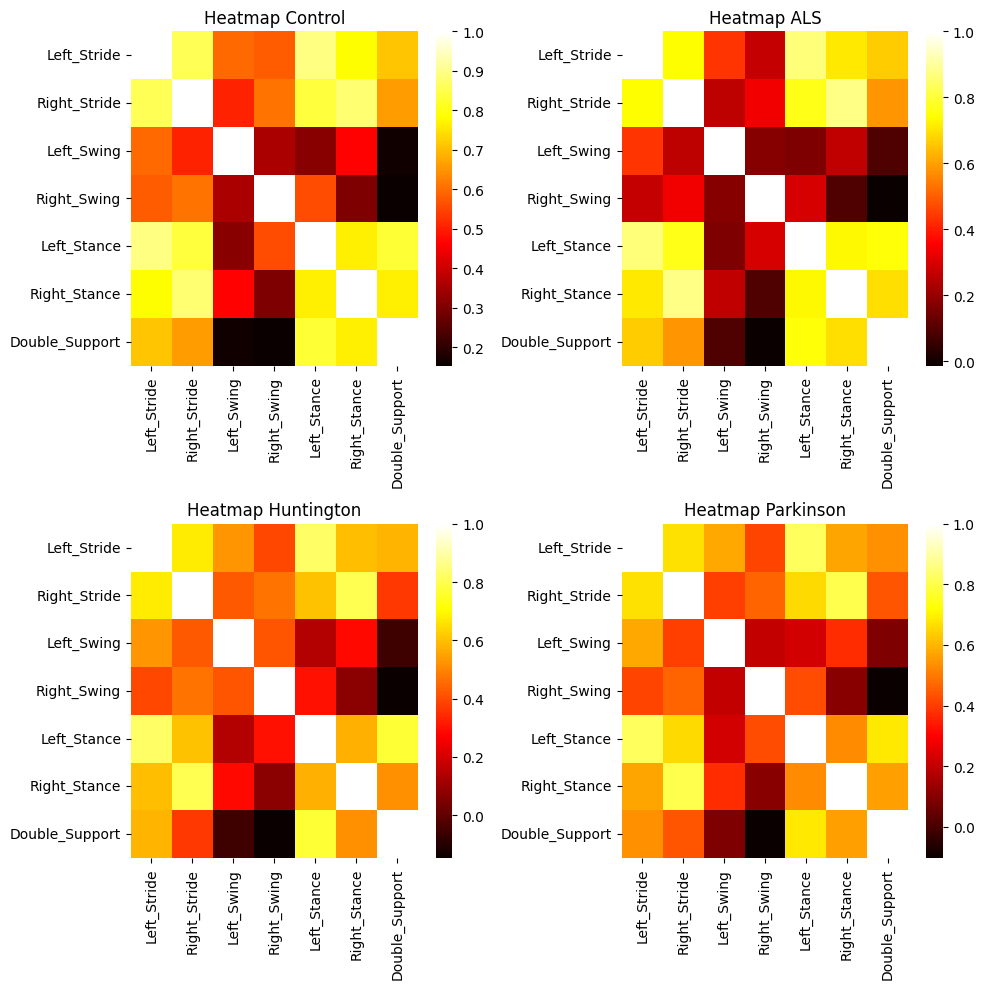

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(mean_corr_control,cmap='hot', ax=axes[0, 0])
axes[0, 0].set_title("Heatmap Control")

sns.heatmap(mean_corr_als,cmap='hot', ax=axes[0, 1])
axes[0, 1].set_title("Heatmap ALS")

sns.heatmap(mean_corr_park,cmap='hot', ax=axes[1, 0])
axes[1, 0].set_title("Heatmap Huntington")

sns.heatmap(mean_corr_hunt,cmap='hot', ax=axes[1, 1])
axes[1, 1].set_title("Heatmap Parkinson")

plt.tight_layout()
plt.show()

# Elección de umbral

## Estadisticos Control

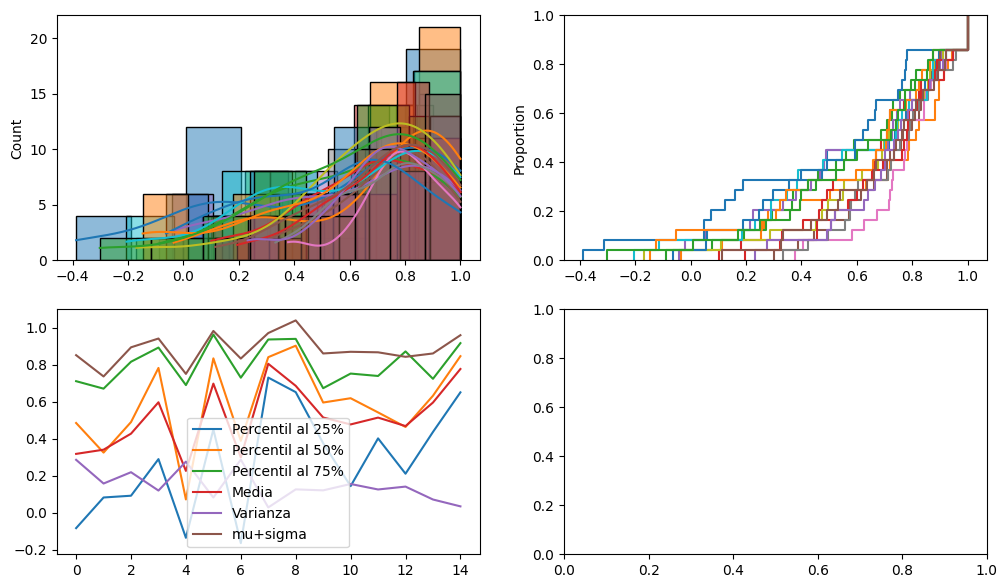

In [34]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_C, th50_C, th75_C, promedio_C, varianza_C, mu_sigma_C=estats(mat_cont)
#Plots
for sujeto in mat_cont:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_5,label='Percentil al 25%')
axes[1][0].plot(th50_5,label='Percentil al 50%')
axes[1][0].plot(th75_5,label='Percentil al 75%')
axes[1][0].plot(promedio_5,label='Media')
axes[1][0].plot(varianza_5,label='Varianza')
axes[1][0].plot(mu_sigma_5,label='mu+sigma')
axes[1][0].legend()

## Esatadisticos ALS

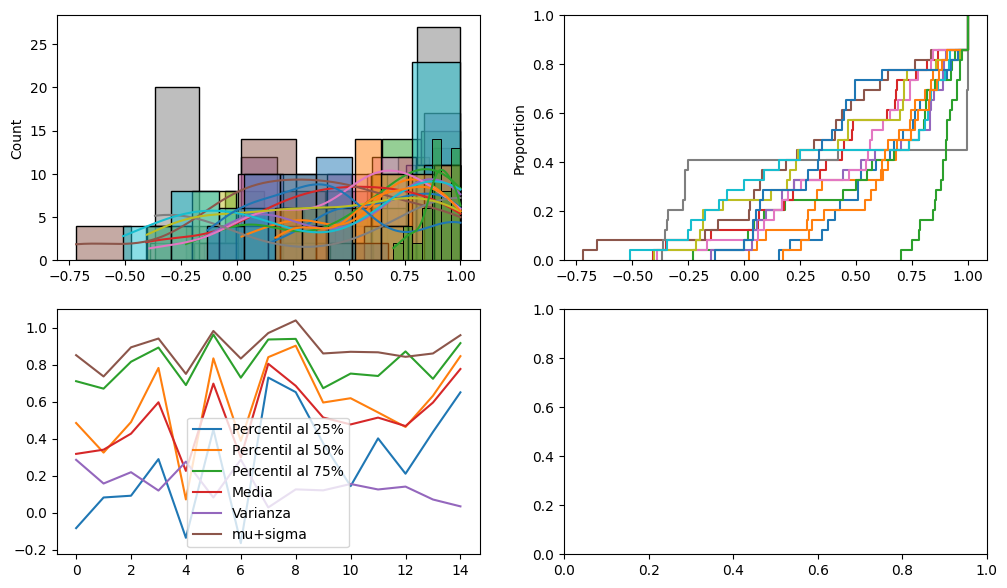

In [37]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_A, th50_A, th75_A, promedio_A, varianza_A, mu_sigma_A=estats(mat_als)
#Plots
for sujeto in mat_als:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_5,label='Percentil al 25%')
axes[1][0].plot(th50_5,label='Percentil al 50%')
axes[1][0].plot(th75_5,label='Percentil al 75%')
axes[1][0].plot(promedio_5,label='Media')
axes[1][0].plot(varianza_5,label='Varianza')
axes[1][0].plot(mu_sigma_5,label='mu+sigma')
axes[1][0].legend()

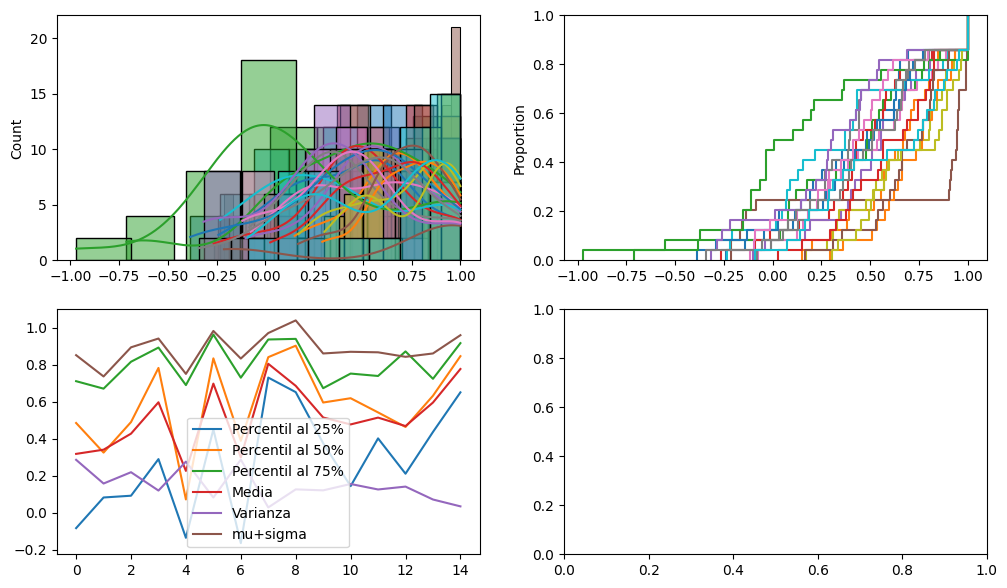

In [36]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_H, th50_H, th75_H, promedio_H, varianza_H, mu_sigma_H=estats(mat_hunt)
#Plots
for sujeto in mat_hunt:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_5,label='Percentil al 25%')
axes[1][0].plot(th50_5,label='Percentil al 50%')
axes[1][0].plot(th75_5,label='Percentil al 75%')
axes[1][0].plot(promedio_5,label='Media')
axes[1][0].plot(varianza_5,label='Varianza')
axes[1][0].plot(mu_sigma_5,label='mu+sigma')
axes[1][0].legend()

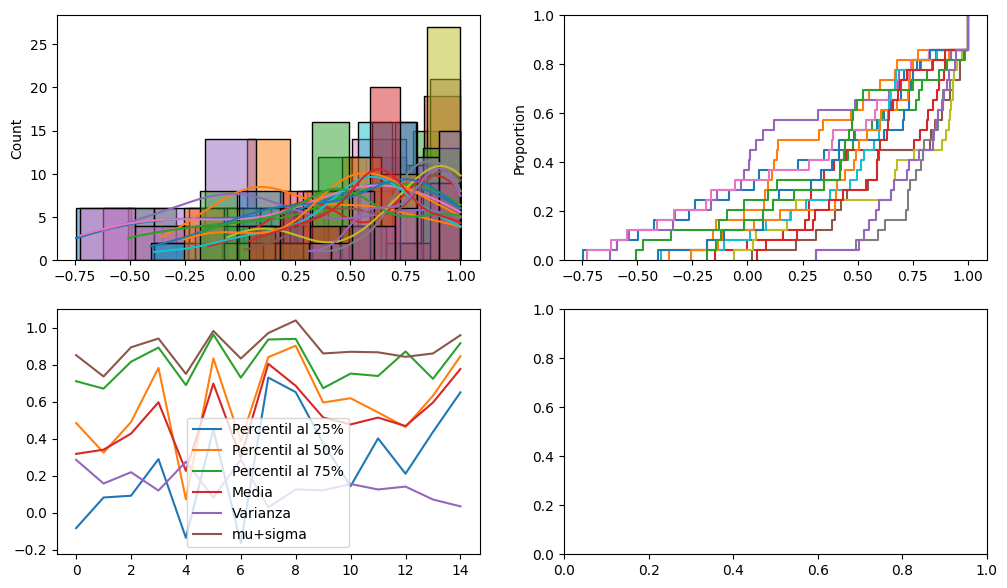

In [35]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_P, th50_P, th75_P, promedio_P, varianza_P, mu_sigma_P=estats(mat_park)
#Plots
for sujeto in mat_park:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_5,label='Percentil al 25%')
axes[1][0].plot(th50_5,label='Percentil al 50%')
axes[1][0].plot(th75_5,label='Percentil al 75%')
axes[1][0].plot(promedio_5,label='Media')
axes[1][0].plot(varianza_5,label='Varianza')
axes[1][0].plot(mu_sigma_5,label='mu+sigma')
axes[1][0].legend()

In [40]:
def estats_df(th25, th50, th75, promedio, mu_sigma):
    estadisticos_df=pd.DataFrame(np.zeros((4,5)),columns=['th25','th50','th75','promedio','mu_sigma'],index=['min','max','mediana','mu_sigma'])
    columnas=[ th25, th50, th75, promedio, mu_sigma]
    for i in range(len(columnas)):
        estadisticos_df.iloc[0,i]= np.min(columnas[i])
        estadisticos_df.iloc[1,i]= np.max(columnas[i])
        estadisticos_df.iloc[2,i]= np.median(columnas[i])
        estadisticos_df.iloc[3,i]= np.mean(columnas[i])
    
    return estadisticos_df

In [41]:
estats_df(th25_C, th50_C, th75_C, promedio_C, mu_sigma_C)

,th25,th50,th75,promedio,mu_sigma
min,0.159571,0.623460,0.774281,0.531725,0.853060
max,0.720105,0.812990,0.914754,0.779442,0.992413
mediana,0.498600,0.738957,0.879674,0.669523,0.932940
mu_sigma,0.471970,0.738155,0.869557,0.656234,0.929516


In [42]:
estats_df(th25_A, th50_A, th75_A, promedio_A, mu_sigma_A)

,th25,th50,th75,promedio,mu_sigma
min,-0.266297,0.393934,0.617863,0.323513,0.774648
max,0.859215,0.998769,0.999653,0.898515,1.076093
mediana,0.194186,0.709840,0.872377,0.508479,0.920674
mu_sigma,0.245757,0.670841,0.833456,0.540769,0.910215


In [43]:
estats_df(th25_H, th50_H, th75_H, promedio_H, mu_sigma_H)

,th25,th50,th75,promedio,mu_sigma
min,-0.112539,0.102755,0.534177,0.196390,0.697404
max,0.902558,0.946989,0.991318,0.739213,1.168888
mediana,0.316811,0.532496,0.783214,0.506287,0.843961
mu_sigma,0.351130,0.572592,0.765179,0.528329,0.856785


In [44]:
estats_df(th25_P, th50_P, th75_P, promedio_P, mu_sigma_P)

,th25,th50,th75,promedio,mu_sigma
min,-0.165551,0.070779,0.670314,0.225265,0.736321
max,0.730164,0.902695,0.963050,0.804809,1.039509
mediana,0.289120,0.595268,0.751897,0.513640,0.866938
mu_sigma,0.274822,0.587577,0.801546,0.515752,0.883995


# Grafo 2D

In [79]:
def grafo_nodirigido(matriz,ax,pos,thr):
    A = matriz.copy()
    np.fill_diagonal(A.to_numpy(), 0)
    A[np.abs(A) < thr] = 0
    G=nx.from_pandas_adjacency(A, create_using=nx.Graph)
    
    plt.figure(figsize=(6,6))
    pesos=nx.get_edge_attributes(G,'weight')
    edge_widths = [abs(w) * 8 for w in pesos.values()]
    edge_colors = ['blue' if w >= 0 else 'red' for w in pesos.values()]
    nx.draw_networkx_nodes(G, pos,ax=ax)
    nx.draw_networkx_edges(G,pos,edge_color=edge_colors,width=edge_widths,alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)
    


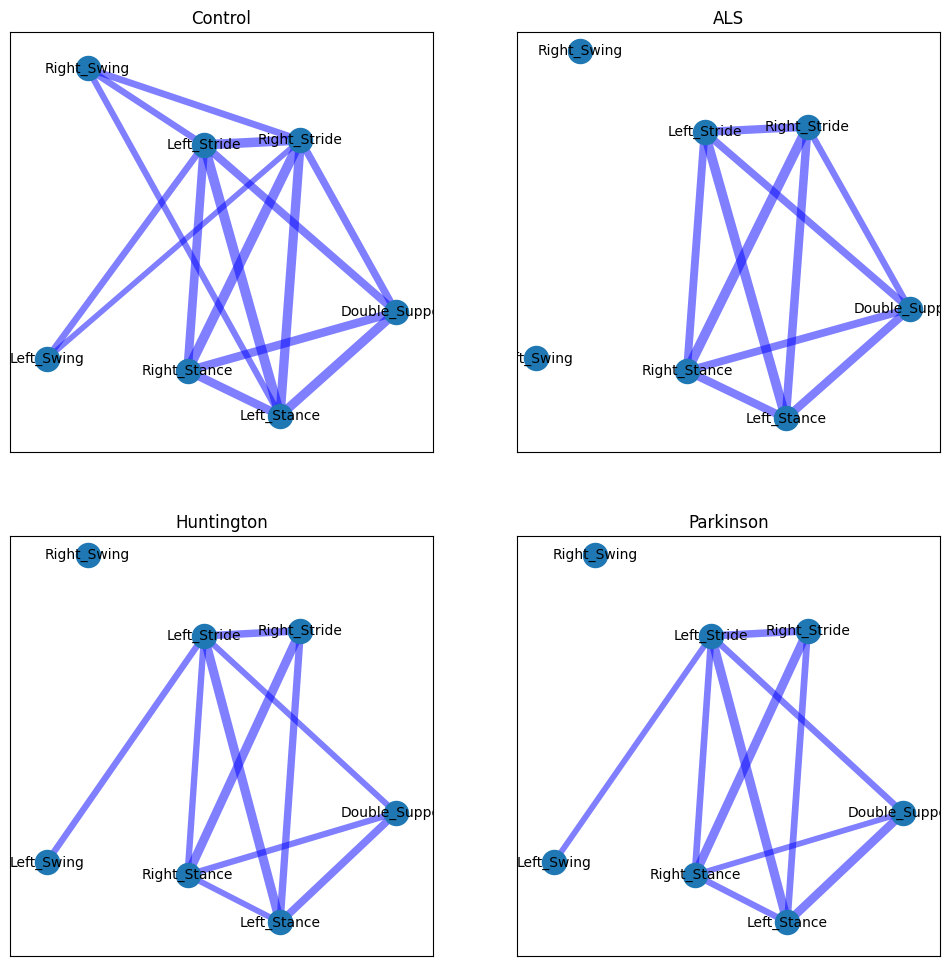

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [89]:
G_control = nx.from_pandas_adjacency(mean_corr_control)
pos_fijo = nx.spring_layout(G_control, seed=42)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

grafo_nodirigido(mean_corr_control, axes[0, 0],pos_fijo,0.5)
axes[0, 0].set_title("Control")

grafo_nodirigido(mean_corr_als, axes[0, 1],pos_fijo,0.5)
axes[0, 1].set_title("ALS")

grafo_nodirigido(mean_corr_hunt, axes[1, 0],pos_fijo,0.5)
axes[1, 0].set_title("Huntington")

grafo_nodirigido(mean_corr_park, axes[1, 1],pos_fijo,0.5)
axes[1, 1].set_title("Parkinson")

plt.tight_layout()
plt.show()

# Métricas

In [174]:
def metricas_grafo(G):

    # (a) Clustering
    clust_coeff = nx.average_clustering(G)

    # (b) Path length
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan

    # (c) Small-worldness
    G_rand = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)

    # (d) Comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)

    # (e) Hubs y centralidades
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)

    # (f) Eficiencias
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    # (g) Rich club
    rich_club = nx.rich_club_coefficient(G, normalized=False)

    # Devolver TODO:
    return {
        "clustering": clust_coeff,
        "path_length": path_length,
        "small_world_sigma": small_world_sigma,
        "modularity": modularity,
        "global_efficiency": global_eff,
        "local_efficiency": local_eff,
        "communities": list(map(list, communities)),
        "betweenness": betweenness,   
        "degree": degree_dict,
        "rich_club": rich_club,
        "closeness": closeness
    }

In [175]:
A1= mean_corr_control.copy()
np.fill_diagonal(A1.to_numpy(), 0)
thr = 0.5
A1[np.abs(A1) < thr] = 0

A2= mean_corr_als.copy()
np.fill_diagonal(A2.to_numpy(), 0)
A2[np.abs(A2) < thr] = 0

A3= mean_corr_hunt.copy()
np.fill_diagonal(A3.to_numpy(), 0)
A3[np.abs(A3) < thr] = 0

A4= mean_corr_park.copy()
np.fill_diagonal(A4.to_numpy(), 0)
A4[np.abs(A4) < thr] = 0

G_control=nx.from_pandas_adjacency(A1, create_using=nx.Graph)
G_als=nx.from_pandas_adjacency(A2, create_using=nx.Graph)
G_hunt=nx.from_pandas_adjacency(A3, create_using=nx.Graph)
G_park=nx.from_pandas_adjacency(A4, create_using=nx.Graph)

metricas = {
    "Control": metricas_grafo(G_control),
    "ALS": metricas_grafo(G_als),
    "Huntington": metricas_grafo(G_hunt),
    "Parkinson": metricas_grafo(G_park)
}

df_metricas = pd.DataFrame(metricas).T
df_metricas

,clustering,path_length,small_world_sigma,modularity,global_efficiency,local_efficiency,communities,betweenness,degree,rich_club,closeness
Control,0.857143,1.285714,1.428571,0.0,0.857143,0.928571,"[[Left_Swing, Double_Support, Right_Stride, Ri...","{'Left_Stride': 0.17777777777777776, 'Right_St...","{'Left_Stride': 6, 'Right_Stride': 6, 'Left_Sw...","{0: 0.7142857142857143, 1: 0.7142857142857143,...","{'Left_Stride': 1.0, 'Right_Stride': 1.0, 'Lef..."
ALS,0.714286,NaN,NaN,0.0,0.47619,0.714286,"[[Double_Support, Left_Stance, Right_Stride, R...","{'Left_Stride': 0.0, 'Right_Stride': 0.0, 'Lef...","{'Left_Stride': 4, 'Right_Stride': 4, 'Left_Sw...","{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}","{'Left_Stride': 0.6666666666666666, 'Right_Str..."
Huntington,0.595238,NaN,NaN,0.008181,0.595238,0.62619,"[[Right_Stride, Double_Support, Left_Stance, R...","{'Left_Stride': 0.28888888888888886, 'Right_St...","{'Left_Stride': 5, 'Right_Stride': 3, 'Left_Sw...","{0: 0.6666666666666666, 1: 0.9, 2: 0.9, 3: 1.0}","{'Left_Stride': 0.8333333333333334, 'Right_Str..."
Parkinson,0.595238,NaN,NaN,-0.003281,0.595238,0.62619,"[[Right_Stride, Double_Support, Left_Stance, R...","{'Left_Stride': 0.28888888888888886, 'Right_St...","{'Left_Stride': 5, 'Right_Stride': 3, 'Left_Sw...","{0: 0.6666666666666666, 1: 0.9, 2: 0.9, 3: 1.0}","{'Left_Stride': 0.8333333333333334, 'Right_Str..."


In [124]:
df_grados=pd.DataFrame(df_metricas['degree'])
df_grados

,degree
Control,"{'Left_Stride': 6, 'Right_Stride': 6, 'Left_Sw..."
ALS,"{'Left_Stride': 4, 'Right_Stride': 4, 'Left_Sw..."
Huntington,"{'Left_Stride': 5, 'Right_Stride': 3, 'Left_Sw..."
Parkinson,"{'Left_Stride': 5, 'Right_Stride': 3, 'Left_Sw..."


# Comunidades

In [125]:
df_metricas['communities']

Control       [[Left_Swing, Double_Support, Right_Stride, Ri...
ALS           [[Double_Support, Left_Stance, Right_Stride, R...
Huntington    [[Right_Stride, Double_Support, Left_Stance, R...
Parkinson     [[Right_Stride, Double_Support, Left_Stance, R...
Name: communities, dtype: object

In [126]:
df_metricas['communities']['Control']

[['Left_Swing',
  'Double_Support',
  'Right_Stride',
  'Right_Swing',
  'Right_Stance',
  'Left_Stance',
  'Left_Stride']]

In [127]:
df_metricas['communities']['ALS']

[['Double_Support',
  'Left_Stance',
  'Right_Stride',
  'Right_Stance',
  'Left_Stride'],
 ['Left_Swing'],
 ['Right_Swing']]

In [128]:
df_metricas['communities']['Huntington']

[['Right_Stride', 'Double_Support', 'Left_Stance', 'Right_Stance'],
 ['Left_Swing', 'Left_Stride'],
 ['Right_Swing']]

In [129]:
df_metricas['communities']['Parkinson']

[['Right_Stride', 'Double_Support', 'Left_Stance', 'Right_Stance'],
 ['Left_Swing', 'Left_Stride'],
 ['Right_Swing']]

# Betweeness

In [140]:
rows = []

for _, fila in df_metricas.iterrows():
    bet_dict = fila["betweenness"]

    for nodo, grado in bet_dict.items():
        rows.append({
            "condicion": _,
            "nodo": nodo,
            "betw": grado
        })

df_bet = pd.DataFrame(rows)
df_bet.pivot(index="nodo", columns="condicion", values="betw")


condicion,ALS,Control,Huntington,Parkinson
nodo,,,,
Double_Support,0.0,0.000000,0.000000,0.000000
Left_Stance,0.0,0.044444,0.022222,0.022222
Left_Stride,0.0,0.177778,0.288889,0.288889
Left_Swing,0.0,0.000000,0.000000,0.000000
Right_Stance,0.0,0.000000,0.022222,0.022222
Right_Stride,0.0,0.177778,0.000000,0.000000
Right_Swing,0.0,0.000000,0.000000,0.000000


# Closeness

In [142]:
rows = []

for _, fila in df_metricas.iterrows():
    cls_dict = fila["closeness"]

    for nodo, grado in cls_dict.items():
        rows.append({
            "condicion": _,
            "nodo": nodo,
            "cls": grado
        })

df_bet = pd.DataFrame(rows)
df_bet.pivot(index="nodo", columns="condicion", values="cls")


condicion,ALS,Control,Huntington,Parkinson
nodo,,,,
Double_Support,0.666667,0.750000,0.595238,0.595238
Left_Stance,0.666667,0.857143,0.694444,0.694444
Left_Stride,0.666667,1.000000,0.833333,0.833333
Left_Swing,0.000000,0.600000,0.462963,0.462963
Right_Stance,0.666667,0.750000,0.694444,0.694444
Right_Stride,0.666667,1.000000,0.595238,0.595238
Right_Swing,0.000000,0.666667,0.000000,0.000000


# Grado

In [143]:
rows = []

for _, fila in df_metricas.iterrows():
    degree_dict = fila["degree"]

    for nodo, grado in degree_dict.items():
        rows.append({
            "condicion": _,
            "nodo": nodo,
            "grado": grado
        })

df_grados = pd.DataFrame(rows)
df_grados.pivot(index="nodo", columns="condicion", values="grado")


condicion,ALS,Control,Huntington,Parkinson
nodo,,,,
Double_Support,4,4,3,3
Left_Stance,4,5,4,4
Left_Stride,4,6,5,5
Left_Swing,0,2,1,1
Right_Stance,4,4,4,4
Right_Stride,4,6,3,3
Right_Swing,0,3,0,0


# Hub

In [144]:
hub_dict = (
    df_grados.loc[df_grados.groupby("condicion")["grado"].idxmax()]
    .set_index("condicion")["nodo"]
    .to_dict()
)
hub_dict

{'ALS': 'Left_Stride',
 'Control': 'Left_Stride',
 'Huntington': 'Left_Stride',
 'Parkinson': 'Left_Stride'}

# Rich Club

In [146]:
rows = []

for _, fila in df_metricas.iterrows():
    rich_dict = fila["rich_club"]

    for nodo, grado in rich_dict.items():
        rows.append({
            "condicion": _,
            "grado k": nodo,
            "rich": grado
        })

df_betw = pd.DataFrame(rows)
df_betw_wide = df_betw.pivot(index="grado k", columns="condicion", values="rich")
df_betw_wide

condicion,ALS,Control,Huntington,Parkinson
grado k,,,,
0,1.0,0.714286,0.666667,0.666667
1,1.0,0.714286,0.900000,0.900000
2,1.0,0.866667,0.900000,0.900000
3,1.0,1.000000,1.000000,1.000000
4,NaN,1.000000,NaN,NaN
5,NaN,1.000000,NaN,NaN


# Grafo 2D con métricas

In [165]:
from matplotlib import colormaps
from networkx.algorithms import community

def grafo_nodirigido(matriz, ax, pos, thr):
    A = matriz.copy()
    np.fill_diagonal(A.to_numpy(), 0)
    A[np.abs(A) < thr] = 0
    G = nx.from_pandas_adjacency(A, create_using=nx.Graph)

    communities = community.greedy_modularity_communities(G)
    com_dict = {}
    for i, grupo in enumerate(communities):
        for nodo in grupo:
            com_dict[nodo] = i
    
    node_colors = [com_dict[n] for n in G.nodes()]
    grados = dict(G.degree())
    node_sizes = [grados[n] * 300 for n in G.nodes()]
    hubs = sorted(grados, key=grados.get, reverse=True)[:1]

    node_linewidths = [3 if n in hubs else 1 for n in G.nodes()]
    node_edgecolors = ["gold" if n in hubs else "black" for n in G.nodes()]

    pesos = nx.get_edge_attributes(G, "weight")
    pesos_lista = list(pesos.values())

    cmap = colormaps.get_cmap("coolwarm")
    edge_colors = [cmap((w + 1)/2) for w in pesos_lista] 
    edge_widths = [abs(w)*5 for w in pesos_lista]

    nx.draw_networkx_nodes(G, pos, ax=ax,node_size=node_sizes,node_color=node_colors,cmap="tab10",linewidths=node_linewidths,edgecolors=node_edgecolors,)
    nx.draw_networkx_edges(G, pos,edge_color=edge_colors,width=edge_widths,alpha=0.7,ax=ax,)
    nx.draw_networkx_labels(G, pos, ax=ax)


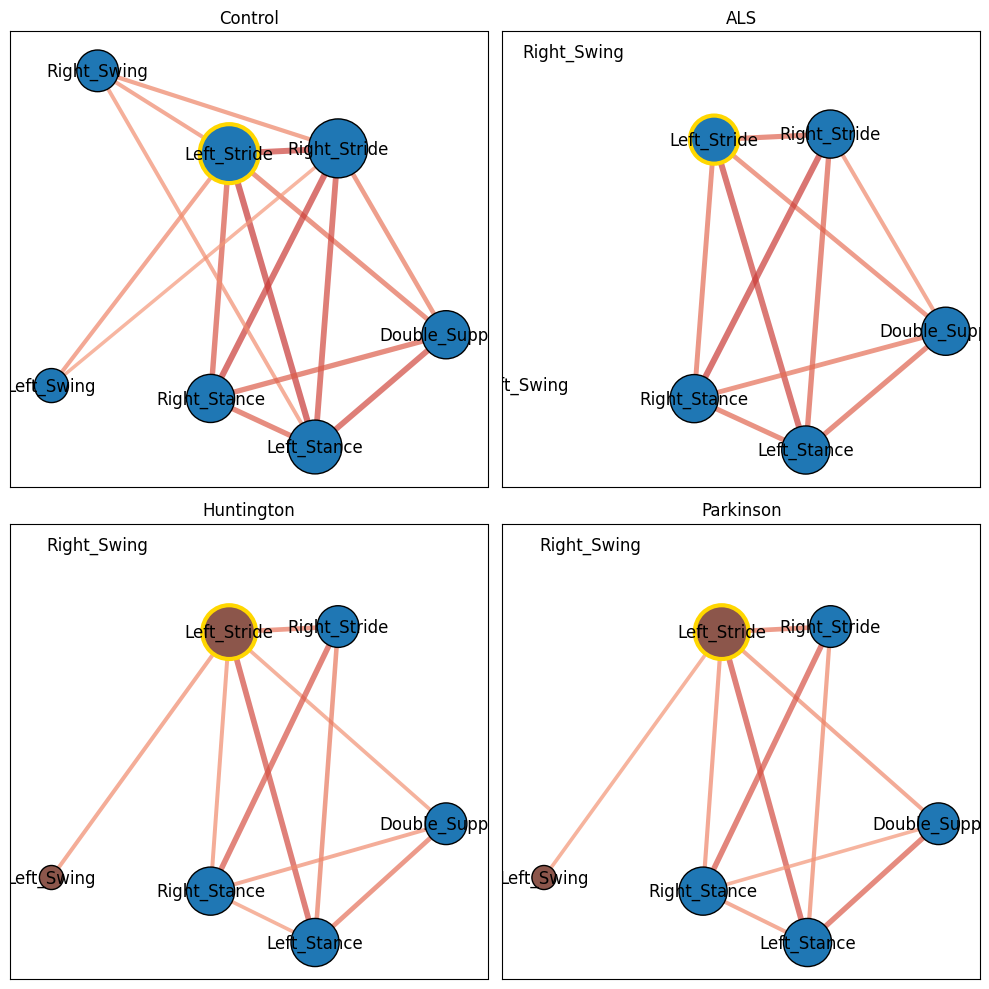

In [167]:
G_control = nx.from_pandas_adjacency(mean_corr_control)
pos_fijo = nx.spring_layout(G_control, seed=42)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

grafo_nodirigido(mean_corr_control, axes[0, 0],pos_fijo,0.5)
axes[0, 0].set_title("Control")

grafo_nodirigido(mean_corr_als, axes[0, 1],pos_fijo,0.5)
axes[0, 1].set_title("ALS")

grafo_nodirigido(mean_corr_hunt, axes[1, 0],pos_fijo,0.5)
axes[1, 0].set_title("Huntington")

grafo_nodirigido(mean_corr_park, axes[1, 1],pos_fijo,0.5)
axes[1, 1].set_title("Parkinson")

plt.tight_layout()
plt.show()